In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
NE_prices_avg = pd.read_csv('E:\\OtherCodeProjects\\Springboard Capstone Projects\\Springboard-Capstone-2-Data\\Niger_food_prices.csv')
NE_prices_avg.head()

,date,days,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail
0,1990-01-01,7305.0,NaN,201.666667,57.750000,61.00,NaN
1,1990-02-01,7336.0,NaN,201.666667,54.250000,63.40,NaN
2,1990-03-01,7364.0,NaN,201.666667,54.750000,65.20,NaN
3,1990-04-01,7395.0,NaN,202.333333,55.500000,69.60,NaN
4,1990-05-01,7425.0,NaN,202.333333,49.666667,63.25,NaN


In [3]:
NE_prices_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      379 non-null    object 
 1   days                      379 non-null    float64
 2   Maize - Retail            329 non-null    float64
 3   Rice (imported) - Retail  379 non-null    float64
 4   Sorghum - Retail          379 non-null    float64
 5   Millet - Retail           379 non-null    float64
 6   Beans (niebe) - Retail    210 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.9+ KB


In [4]:
NE_prices_avg['date'] = pd.to_datetime(NE_prices_avg['date'])
NE_prices_avg['date'].dtype

dtype('<M8[ns]')

In [5]:
NE_prices_avg.describe(include='all')

C:\Users\William\AppData\Local\Temp\ipykernel_24568\2483228287.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  NE_prices_avg.describe(include='all')


,date,days,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail
count,379,379.000000,329.000000,379.000000,379.000000,379.000000,210.000000
unique,379,NaN,NaN,NaN,NaN,NaN,NaN
top,1990-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,1990-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13056.860158,183.720155,358.604192,157.184086,164.053058,242.776203
std,NaN,3334.503386,50.463660,100.458881,62.116393,65.912217,95.826828
min,NaN,7305.000000,58.250000,175.000000,45.666667,51.600000,93.583333
25%,NaN,10181.000000,141.737500,294.083333,111.500000,105.832317,176.108599


In [6]:
#NE_prices_avg.set_index('days', inplace=True)
#NE_prices_avg.head()

In [7]:
#NE_prices_avg['Millet-Percent'] = NE_prices_avg['Millet - Retail'].pct_change()
#NE_prices_avg.head()

In [8]:
x1 = list(NE_prices_avg['Millet - Retail'].values)[1:-1]
x2 = list(NE_prices_avg['Millet - Retail'].values)[:-2]
y = list(NE_prices_avg['Millet - Retail'].values)[2:]

X = [list(row) for row in zip(x1, x2)]

In [9]:
len(X)

377

In [10]:
len(y)

377

In [11]:
#plt.scatter(X, y)
#plt.show()

In [12]:
LR = LinearRegression()

LR.fit(X, y)

y_pred = LR.predict(X)

In [13]:
LR.score(X, y)

0.9572540775597417

In [14]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y_pred - y)**2))
    

In [15]:
rmse(y, y_pred) 

13.558522394893785

In [16]:
LR.coef_

array([ 1.40409262, -0.44131317])

In [17]:
LR.intercept_

6.456230500830912

**NEW SECTION**

In [18]:
train = NE_prices_avg[NE_prices_avg['date'].dt.strftime('%Y') < '2018']
test = NE_prices_avg[NE_prices_avg['date'].dt.strftime('%Y') >= '2018']

In [19]:
X_train, X_test = pd.DataFrame(train['days']), pd.DataFrame(test['days'])
y_train, y_test = train['Millet - Retail'], test['Millet - Retail']

<AxesSubplot: >

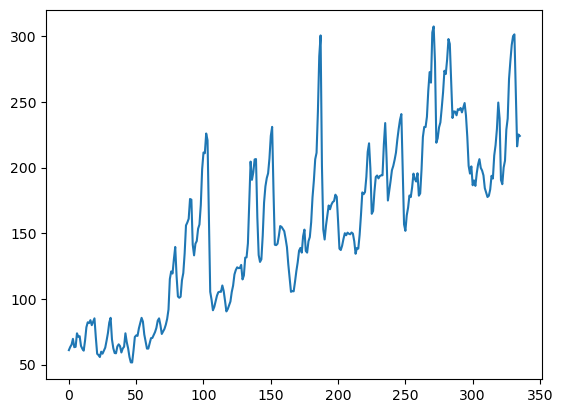

In [20]:
y_train.plot()

In [21]:
LR = LinearRegression()

LR.fit(X_train, y_train)

train_predict = LR.predict(X_train)
test_predict = LR.predict(X_test)

In [22]:
print('train rmse:', rmse(y_train, train_predict))
print('test rmse:', rmse(y_test, test_predict))

train rmse: 33.73973999996994
test rmse: 43.03445910490335


In [23]:
def plot_predict(X_train, X_test, y_train, y_test, train_predict, test_predict):
    plt.plot(X_train['days'], y_train, color='g', label='Train data')
    plt.plot(X_test['days'], y_test, color='r', label='Test data')
    plt.plot(X_train['days'], train_predict, color='b', label='Train prediction')
    plt.plot(X_test['days'], test_predict, color='k', label='Test prediction')
    plt.legend()
    return plt.show()

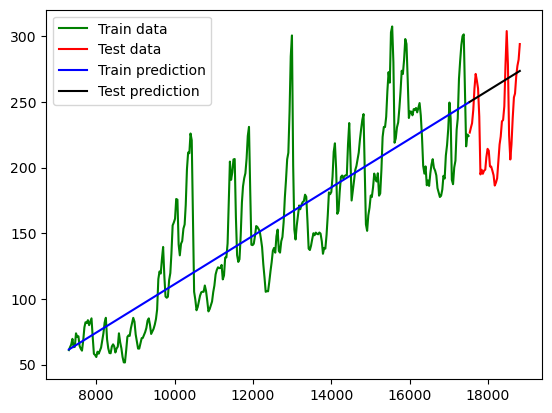

In [24]:
plot_predict(X_train, X_test, y_train, y_test, train_predict, test_predict)

In [25]:
NE_prices_avg.head()

,date,days,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail
0,1990-01-01,7305.0,NaN,201.666667,57.750000,61.00,NaN
1,1990-02-01,7336.0,NaN,201.666667,54.250000,63.40,NaN
2,1990-03-01,7364.0,NaN,201.666667,54.750000,65.20,NaN
3,1990-04-01,7395.0,NaN,202.333333,55.500000,69.60,NaN
4,1990-05-01,7425.0,NaN,202.333333,49.666667,63.25,NaN


In [26]:
NE_prices_avg['year'] = pd.DatetimeIndex(NE_prices_avg['date']).year
NE_prices_avg['month'] = pd.DatetimeIndex(NE_prices_avg['date']).month

NE_prices_avg.head()

,date,days,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail,year,month
0,1990-01-01,7305.0,NaN,201.666667,57.750000,61.00,NaN,1990,1
1,1990-02-01,7336.0,NaN,201.666667,54.250000,63.40,NaN,1990,2
2,1990-03-01,7364.0,NaN,201.666667,54.750000,65.20,NaN,1990,3
3,1990-04-01,7395.0,NaN,202.333333,55.500000,69.60,NaN,1990,4
4,1990-05-01,7425.0,NaN,202.333333,49.666667,63.25,NaN,1990,5


In [27]:
train = NE_prices_avg[NE_prices_avg['date'].dt.strftime('%Y') < '2018']
test = NE_prices_avg[NE_prices_avg['date'].dt.strftime('%Y') >= '2018']

In [28]:
included_features = ['days', 'year', 'month']
X_train, X_test = pd.DataFrame(train[included_features]), pd.DataFrame(test[included_features])
y_train, y_test = train['Millet - Retail'], test['Millet - Retail']

In [29]:
X_train = pd.get_dummies(X_train, columns=['month'])
X_test = pd.get_dummies(X_test, columns=['month'])

In [30]:
LR = LinearRegression()

LR.fit(X_train, y_train)

train_predict = LR.predict(X_train)
test_predict = LR.predict(X_test)

In [31]:
print('train rmse:', rmse(y_train, train_predict))
print('test rmse:', rmse(y_test, test_predict))

train rmse: 28.487566324463685
test rmse: 35.81046077610647


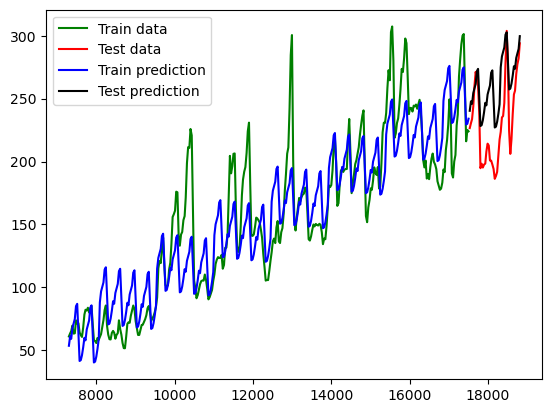

In [32]:
plot_predict(X_train, X_test, y_train, y_test, train_predict, test_predict)

In [37]:
included_features = ['days', 'year', 'month', 'Rice (imported) - Retail']

X_train, X_test = pd.DataFrame(train[included_features]), pd.DataFrame(test[included_features])
y_train, y_test = train['Millet - Retail'], test['Millet - Retail']

In [38]:
X_train = pd.get_dummies(X_train, columns=['month'])
X_test = pd.get_dummies(X_test, columns=['month'])

In [39]:
LR = LinearRegression()

LR.fit(X_train, y_train)

train_predict = LR.predict(X_train)
test_predict = LR.predict(X_test)

print('train rmse:', rmse(y_train, train_predict))
print('test rmse:', rmse(y_test, test_predict))

train rmse: 27.763752444998616
test rmse: 27.921631856808016


In [42]:
pipe = Pipeline([
    ('MinMax Scaling', MinMaxScaler()),
    ('Linear Regressor', LinearRegression())
])

In [43]:
pipe.fit(X_train, y_train)

train_predict = pipe.predict(X_train)
test_predict = pipe.predict(X_test)

print('train rmse:', rmse(y_train, train_predict))
print('test rmse:', rmse(y_test, test_predict))

train rmse: 27.76375244503683
test rmse: 27.92163185885057


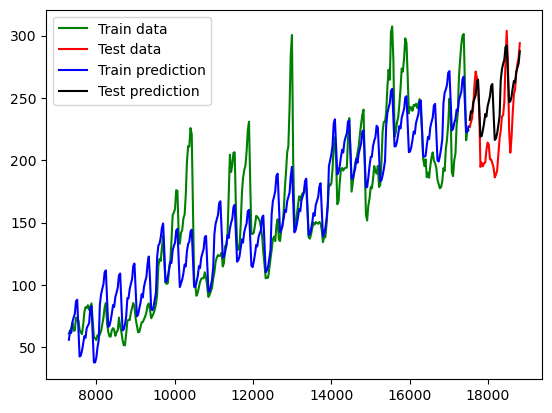

In [44]:
plot_predict(X_train, X_test, y_train, y_test, train_predict, test_predict)